The Hot Jupiter is also called Kepler-448 b.

Transit epoch [BKJD]
146.596466±0.000163 

Orbital Period [days]
17.855221681±3.676e-06

Eccentricity may be wrong:

[Bourrier et al. 2015](https://ui.adsabs.harvard.edu/link_gateway/2015A&A...579A..55B/doi:10.1051/0004-6361/201525750): We did not detect a significant eccentricity, with a 3σ upper limit of 0.72.

[Masuda 2017](https://ui.adsabs.harvard.edu/link_gateway/2017AJ....154...64M/doi:10.3847/1538-3881/aa7aeb) follows up on that.

In [1]:
# Python3.6
import numpy as np
import pandas as pd

from eccentric.spimodel import SPI_Model

import matplotlib.pyplot as plt
%matplotlib inline

### Read in real data

In [ ]:
orbital_period = 17.85523 # days

In [4]:
df = pd.read_csv("data/2019_11_05_KOI12_flares_full_sample.csv")
times = df.loc[df.c > -.5, "tstart"].values
times

array([ 265.07372213,  300.35288372,  493.4727546 , 1032.03225935,
       1207.2782728 , 1337.50263465, 1089.8238533 , 1225.43502121,
       1307.49692698, 1406.03514732,  124.03811669,  215.52434402,
        331.93007315,  382.8739885 ,  472.36385793,  482.73847176,
        606.40471374,  826.64222939,  849.41372494,  928.46100234,
        956.61692765, 1137.44033693, 1239.13572447, 1300.0657261 ,
       1367.83321092, 1370.90021717, 1457.9196579 , 1542.54274159])

### Instantiate a model for flaring SPI with given data

In [5]:
spi = SPI_Model(major_axis_a=sf.hjhost.major_axis_a,
                eccentricity=.72,
                data=times,
                model ='inverse_distance_influence',
                n_orbits=sf.observation_deltat / sf.hjhost.period)

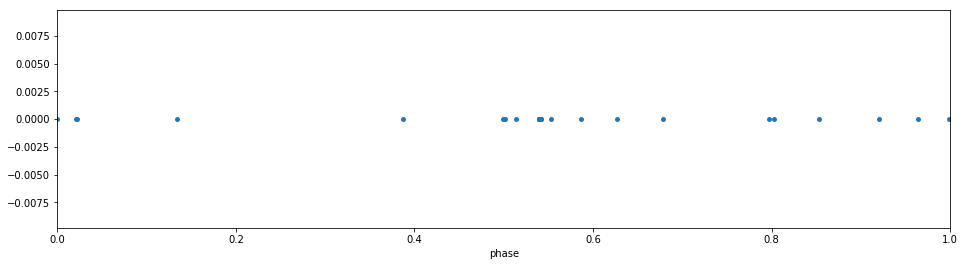

In [6]:
plt.figure(figsize=(16,4))
plt.scatter(sf.all_flares.stacked_peak_time, len(sf.all_flares.stacked_peak_time)*[0], s=15)
plt.xlabel("phase")
plt.xlim(0,1);

In [7]:
len(sf.all_flares.stacked_peak_time)

36

In [8]:
a, b = spi.estimate_two_parameters()
a, b
# gives base intensity and peak scaling factor

(1.434477485054132, 13.724884531144605)

In [9]:
spi.thinning()


In [10]:
len(spi.hom), len(spi.inhom)

(2, 34)

In [11]:
model = spi.intensity_function()

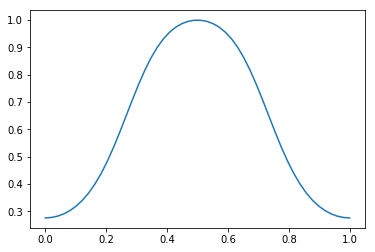

In [12]:
x = np.linspace(0,1,50)
plt.plot(x, model(x, spi.MLE_params[0], spi.MLE_params[1], sf.hjhost.eccentricity, sf.hjhost.major_axis_a)/spi.MLE_params[1])

In [13]:
# Wann ist der Peak?
# What if I do not have full periods covered?

In [14]:
np.random.exponential(1e-3)

0.0008407093844328914

In [15]:
np.random.poisson(lam = .2,
                                      size = 1000)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,